## import bibliotek

In [15]:

import copy
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import optuna
from optuna.trial import Trial
import torch.optim.swa_utils as swa_utils


## Generowaie funkcji losowej

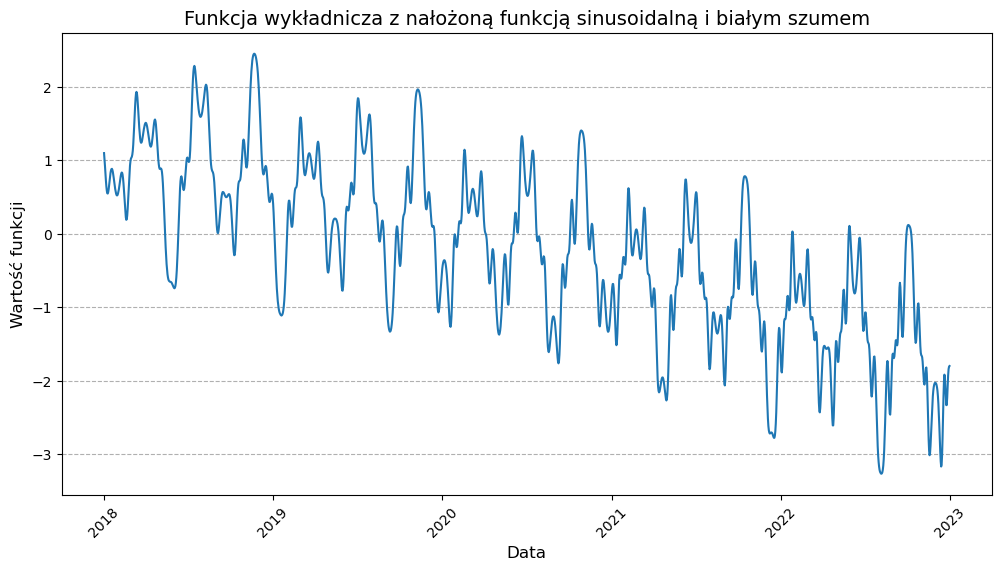

In [2]:
# Twój szereg czasowy (przykładowe dane)
daty = pd.date_range(start='2018-01-01', end='2022-12-31', freq='D')
df = pd.DataFrame({'data': daty})
df.set_index('data', inplace=True)

# # Utwórz wektor czasu o długości takiej samej jak df
t = np.linspace(1, 2, len(df))  # Skalujemy czas do przedziału [0, 1]

# # Wygeneruj funkcję wielomianową
# poly_func = 2 * t**3 - 8 * t**2 + 2*t  # Przykładowy wielomian

# # Wygeneruj funkcję sinusoidalną
# sin_func = np.sin(18 * np.pi * t)

# # Wygeneruj biały szum
# noise = np.random.normal(0, 0.0015, len(df))

# # Połącz funkcje i dodaj do DataFrame'u
# df['combined_func'] = poly_func + sin_func + noise

# Trial 151 finished with value: 4.206409399770564 and parameters: 
# {'hidden_dim': 7, 'num_layers': 1, 
# 'lerning_opti_rate': 0.007526508076627938, 
# 'dropout_prob': 0.05088814404525758,
# 'weight_decay': 0.0004296664716162247,
# 'seq_length': 14, 'swa_start': 45}. Best is trial 151 with value: 4.206409399770564.
#######################################################################################


# Parametry funkcji
a = 0.1
b = -0.5
c = 1
d = -2
e = 0.5
f = 0.75
g = 6
h = 31
i = 31

# Wygeneruj funkcję wielomianową
poly_func = a * t**5 + b * t**4 + c * t**3 + d * t**2 + e * t +2

# Wygeneruj funkcję sinusoidalną nośną
sin_func = np.sin(i * np.pi * t)

# Wygeneruj funkcję modulującą
modulating_func = f * np.sin(g * (np.pi**2 + sin_func) * t)

# Zastosuj modulację amplitudy
modulated_sin_func = (1 + modulating_func) * sin_func

# Wygeneruj biały szum
noise = np.random.normal(0, 0.001, len(df))

# Połącz funkcje i dodaj do DataFrame'u
df['combined_func'] = poly_func + modulated_sin_func + noise 


# Tworzenie wykresu liniowego
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['combined_func'])

# Ustawienia wykresu
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość funkcji', fontsize=12)
plt.title('Funkcja wykładnicza z nałożoną funkcją sinusoidalną i białym szumem', fontsize=14)
plt.xticks(rotation=45)  # Obrót etykiet osi X dla lepszej czytelności
plt.grid(axis='y', linestyle='--')  # Dodanie siatki na osi Y

# Wyświetlenie wykresu
plt.show()

In [3]:
# from statsmodels.tsa.seasonal import MSTL, DecomposeResult, STL, seasonal_decompose

# total_column = df['combined_func']
# # Dekompozycja MSTL
# mstl = seasonal_decompose(total_column)  # Zakładamy sezonowość roczną (365 dni)
# result = mstl.fit()

# # Przygotowanie danych do wizualizacji w seaborn
# df_results = pd.DataFrame({
#     'Oryginalne dane': total_column,
#     'Trend': result.trend,
#     'Sezonowość (roczna)': result.seasonal,
#     'Reszta': result.resid
# })
# df_results = df_results.stack().reset_index()  # Przekształcenie do formatu "długiego"
# df_results.columns = ['Czas', 'Składowa', 'Wartość']

# df_results.to_csv('MSTL.txt')
# # Wizualizacja z seaborn
# sns.set_theme(style="darkgrid")

# plt.figure(figsize=(14, 10))
# sns.lineplot(x='Czas', y='Wartość', hue='Składowa', data=df_results)
# plt.title('Dekompozycja MSTL')
# plt.xlabel('Czas')
# plt.ylabel('Wartość')
# plt.legend(title='Składowe')
# plt.show()

# # Opcjonalnie: Możesz wyświetlić podsumowanie dekompozycji, ale funkcja summary() nie jest jeszcze dostępna
# # w statsmodels dla obiektów DecomposeResult. Możesz śledzić rozwój tej funkcjonalności.
# # print(result.summary())  

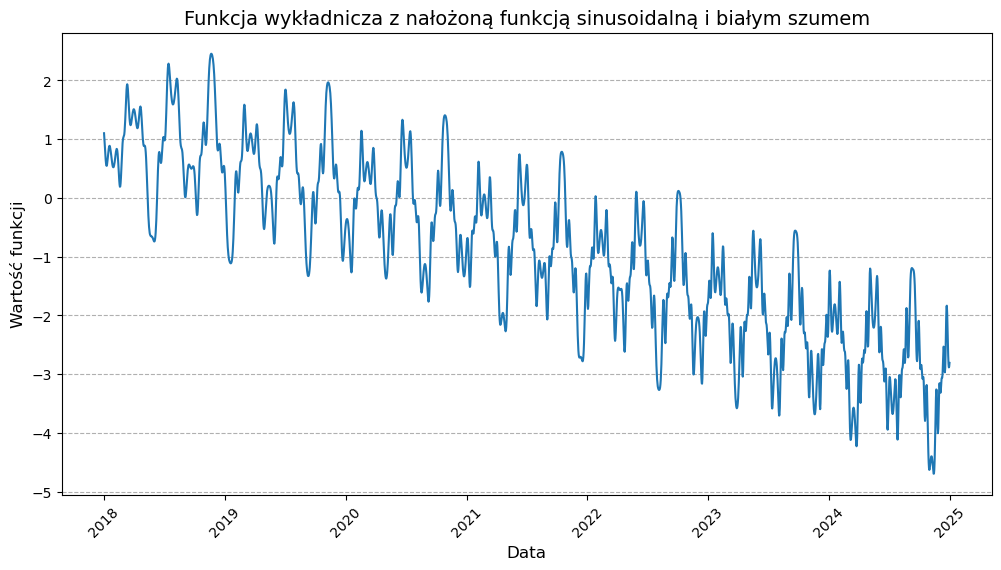

In [4]:
# Twój szereg czasowy (przykładowe dane)
datyy = pd.date_range(start='2018-01-01', end='2024-12-31', freq='D')
dff = pd.DataFrame({'data': datyy})
dff.set_index('data', inplace=True)

# # Utwórz wektor czasu o długości takiej samej jak df
t = np.linspace(1, 2.400328587075575, len(dff))  # Skalujemy czas do przedziału [0, 1]

# Parametry funkcji
a = 0.1
b = -0.5
c = 1
d = -2
e = 0.5
f = 0.75
g = 6
h = 31
i = 31

# Wygeneruj funkcję wielomianową
poly_func = a * t**5 + b * t**4 + c * t**3 + d * t**2 + e * t +2

# Wygeneruj funkcję sinusoidalną nośną
sin_func = np.sin(i * np.pi * t)

# Wygeneruj funkcję modulującą
modulating_func = f * np.sin(g * (np.pi**2 + sin_func) * t)

# Zastosuj modulację amplitudy
modulated_sin_func = (1 + modulating_func) * sin_func

# Wygeneruj biały szum
noise = np.random.normal(0, 0.001, len(dff))

# Połącz funkcje i dodaj do DataFrame'u
dff['combined_func'] = poly_func + modulated_sin_func + noise 


# Tworzenie wykresu liniowego
plt.figure(figsize=(12, 6))
sns.lineplot(x=dff.index, y=dff['combined_func'])

# Ustawienia wykresu
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość funkcji', fontsize=12)
plt.title('Funkcja wykładnicza z nałożoną funkcją sinusoidalną i białym szumem', fontsize=14)
plt.xticks(rotation=45)  # Obrót etykiet osi X dla lepszej czytelności
plt.grid(axis='y', linestyle='--')  # Dodanie siatki na osi Y

# Wyświetlenie wykresu
plt.show()

In [5]:
(dff.shape[0]/df.shape[0])

1.400328587075575

### Generowanie podziału

In [6]:
# Ustawienia podziału
n_splits = 4  # Liczba foldów
fold_size = len(df) // n_splits  # Zaokrąglenie w dół, aby uniknąć przekroczenia zakresu

# Funkcja do generowania indeksów podziału
def custom_time_series_split(df, n_splits, fold_size):
    fold_start = 0  # Zaczynamy od początku
    for i in range(n_splits):
        fold_end = fold_start + fold_size - 1

        train_size = int(fold_size * 0.80)  # 85% na trening
        val_size = int(fold_size * 0.10)  # 10% na walidację
        test_size = fold_size - train_size - val_size  # 5% na test

        train_end = fold_start + train_size - 1
        val_start = train_end + 1
        val_end = val_start + val_size - 1
        test_start = val_end + 1
        test_end = fold_end

        # Indeksy dla zbiorów
        train_index = df.iloc[fold_start: train_end + 1].index
        test_index = df.iloc[test_start: test_end + 1].index

        # Sprawdzenia diagnostyczne
        assert train_end < val_start, f"Fold {i+1}: Zbiór treningowy nachodzi na walidacyjny!"
        assert val_end < test_start, f"Fold {i+1}: Zbiór walidacyjny nachodzi na testowy!"
        assert test_end <= len(df) - 1, f"Fold {i+1}: Zbiór testowy wykracza poza zakres danych!"

        yield train_index, test_index

        fold_start = test_end + 1  # Kolejny fold zaczyna się po końcu poprzedniego testu

# Iteracja po foldach
for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
    # Wyświetlanie indeksów w jednym wierszu
    val_start_date = train_index[-1] + pd.DateOffset(days=1)  # Zaczynamy dzień po treningu
    val_end_date = test_index[0] - pd.DateOffset(days=1)  # Kończymy dzień przed testem

    print(f"\nFold {fold+1}:")
    print(f"  Trening: od {train_index[0].date()} do {train_index[-1].date()}")
    print(f"  Walidacja: od {val_start_date.date()} do {val_end_date.date()}")
    print(f"  Test: od {test_index[0].date()} do {test_index[-1].date()}")



Fold 1:
  Trening: od 2018-01-01 do 2018-12-30
  Walidacja: od 2018-12-31 do 2019-02-13
  Test: od 2019-02-14 do 2019-04-01

Fold 2:
  Trening: od 2019-04-02 do 2020-03-30
  Walidacja: od 2020-03-31 do 2020-05-14
  Test: od 2020-05-15 do 2020-06-30

Fold 3:
  Trening: od 2020-07-01 do 2021-06-29
  Walidacja: od 2021-06-30 do 2021-08-13
  Test: od 2021-08-14 do 2021-09-29

Fold 4:
  Trening: od 2021-09-30 do 2022-09-28
  Walidacja: od 2022-09-29 do 2022-11-12
  Test: od 2022-11-13 do 2022-12-29


# Prosty model

Fold 1, Epoch 1, Train Loss: 0.7422, Val Loss: 0.4929
Fold 1, Epoch 2, Train Loss: 0.3465, Val Loss: 0.2878
Fold 1, Epoch 3, Train Loss: 0.1635, Val Loss: 0.1513
Fold 1, Epoch 4, Train Loss: 0.0824, Val Loss: 0.1247
Fold 1, Epoch 5, Train Loss: 0.0452, Val Loss: 0.0901
Fold 1, Epoch 6, Train Loss: 0.0234, Val Loss: 0.0667
Fold 1, Epoch 7, Train Loss: 0.0149, Val Loss: 0.0517
Fold 1, Epoch 8, Train Loss: 0.0092, Val Loss: 0.0398
Fold 1, Epoch 9, Train Loss: 0.0069, Val Loss: 0.0325
Fold 1, Epoch 10, Train Loss: 0.0058, Val Loss: 0.0277
Fold 1, Epoch 11, Train Loss: 0.0047, Val Loss: 0.0241
Fold 1, Epoch 12, Train Loss: 0.0043, Val Loss: 0.0215
Fold 1, Epoch 13, Train Loss: 0.0037, Val Loss: 0.0193
Fold 1, Epoch 14, Train Loss: 0.0032, Val Loss: 0.0181
Fold 1, Epoch 15, Train Loss: 0.0030, Val Loss: 0.0160
Fold 1, Epoch 16, Train Loss: 0.0029, Val Loss: 0.0153
Fold 1, Epoch 17, Train Loss: 0.0026, Val Loss: 0.0135
Fold 1, Epoch 18, Train Loss: 0.0027, Val Loss: 0.0130
Fold 1, Epoch 19, T

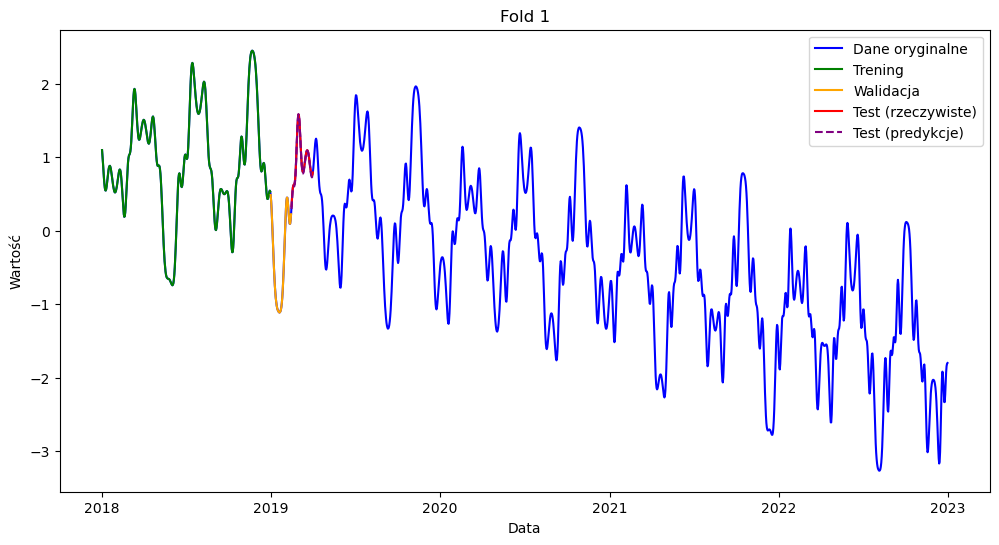

Fold 2, Epoch 1, Train Loss: 0.0012, Val Loss: 0.0023
Fold 2, Epoch 2, Train Loss: 0.0009, Val Loss: 0.0012
Fold 2, Epoch 3, Train Loss: 0.0009, Val Loss: 0.0011
Fold 2, Epoch 4, Train Loss: 0.0008, Val Loss: 0.0009
Fold 2, Epoch 5, Train Loss: 0.0007, Val Loss: 0.0007
Fold 2, Epoch 6, Train Loss: 0.0007, Val Loss: 0.0006
Fold 2, Epoch 7, Train Loss: 0.0007, Val Loss: 0.0005
Fold 2, Epoch 8, Train Loss: 0.0008, Val Loss: 0.0005
Fold 2, Epoch 9, Train Loss: 0.0006, Val Loss: 0.0005
Fold 2, Epoch 10, Train Loss: 0.0006, Val Loss: 0.0004
Fold 2, Epoch 11, Train Loss: 0.0006, Val Loss: 0.0004
Fold 2, Epoch 12, Train Loss: 0.0005, Val Loss: 0.0004
Fold 2, Epoch 13, Train Loss: 0.0006, Val Loss: 0.0005
Fold 2, Epoch 14, Train Loss: 0.0006, Val Loss: 0.0007
Fold 2, Epoch 15, Train Loss: 0.0006, Val Loss: 0.0010
Fold 2, Epoch 16, Train Loss: 0.0008, Val Loss: 0.0020
Fold 2, Epoch 17, Train Loss: 0.0011, Val Loss: 0.0026
Fold 2, Epoch 18, Train Loss: 0.0012, Val Loss: 0.0022
Fold 2, Epoch 19, T

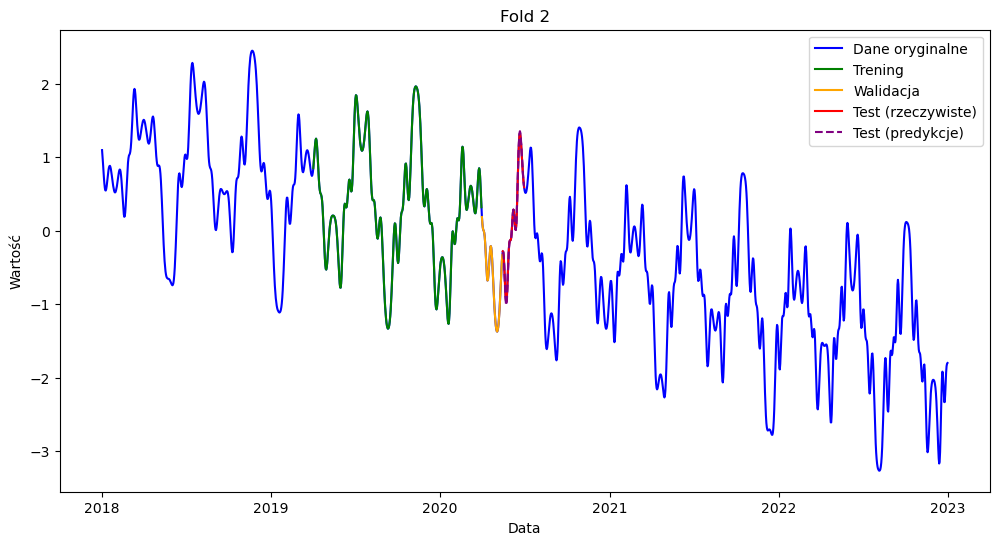

Fold 3, Epoch 1, Train Loss: 0.0040, Val Loss: 0.0050
Fold 3, Epoch 2, Train Loss: 0.0103, Val Loss: 0.7758
Fold 3, Epoch 3, Train Loss: 0.5051, Val Loss: 0.3037
Fold 3, Epoch 4, Train Loss: 0.1701, Val Loss: 0.0322
Fold 3, Epoch 5, Train Loss: 0.0254, Val Loss: 0.0065
Fold 3, Epoch 6, Train Loss: 0.0120, Val Loss: 0.0073
Fold 3, Epoch 7, Train Loss: 0.0097, Val Loss: 0.0066
Fold 3, Epoch 8, Train Loss: 0.0087, Val Loss: 0.0049
Fold 3, Epoch 9, Train Loss: 0.0077, Val Loss: 0.0039
Fold 3, Epoch 10, Train Loss: 0.0076, Val Loss: 0.0037
Fold 3, Epoch 11, Train Loss: 0.0069, Val Loss: 0.0034
Fold 3, Epoch 12, Train Loss: 0.0057, Val Loss: 0.0031
Fold 3, Epoch 13, Train Loss: 0.0056, Val Loss: 0.0028
Fold 3, Epoch 14, Train Loss: 0.0059, Val Loss: 0.0026
Fold 3, Epoch 15, Train Loss: 0.0050, Val Loss: 0.0024
Fold 3, Epoch 16, Train Loss: 0.0053, Val Loss: 0.0024
Fold 3, Epoch 17, Train Loss: 0.0050, Val Loss: 0.0023
Fold 3, Epoch 18, Train Loss: 0.0052, Val Loss: 0.0023
Fold 3, Epoch 19, T

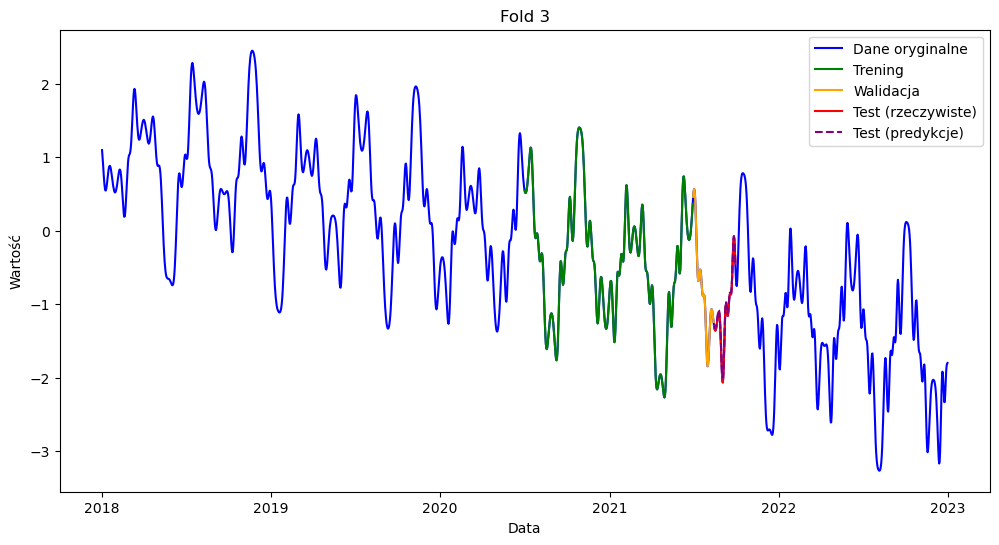

Fold 4, Epoch 1, Train Loss: 0.0145, Val Loss: 0.0958
Fold 4, Epoch 2, Train Loss: 0.2058, Val Loss: 0.2936
Fold 4, Epoch 3, Train Loss: 0.2092, Val Loss: 0.0039
Fold 4, Epoch 4, Train Loss: 0.0152, Val Loss: 0.0115
Fold 4, Epoch 5, Train Loss: 0.0131, Val Loss: 0.0032
Fold 4, Epoch 6, Train Loss: 0.0087, Val Loss: 0.0013
Fold 4, Epoch 7, Train Loss: 0.0063, Val Loss: 0.0014
Fold 4, Epoch 8, Train Loss: 0.0051, Val Loss: 0.0017
Fold 4, Epoch 9, Train Loss: 0.0047, Val Loss: 0.0013
Fold 4, Epoch 10, Train Loss: 0.0042, Val Loss: 0.0010
Fold 4, Epoch 11, Train Loss: 0.0039, Val Loss: 0.0010
Fold 4, Epoch 12, Train Loss: 0.0036, Val Loss: 0.0010
Fold 4, Epoch 13, Train Loss: 0.0040, Val Loss: 0.0010
Fold 4, Epoch 14, Train Loss: 0.0038, Val Loss: 0.0009
Fold 4, Epoch 15, Train Loss: 0.0034, Val Loss: 0.0009
Fold 4, Epoch 16, Train Loss: 0.0037, Val Loss: 0.0009
Fold 4, Epoch 17, Train Loss: 0.0036, Val Loss: 0.0009
Fold 4, Epoch 18, Train Loss: 0.0033, Val Loss: 0.0009
Fold 4, Epoch 19, T

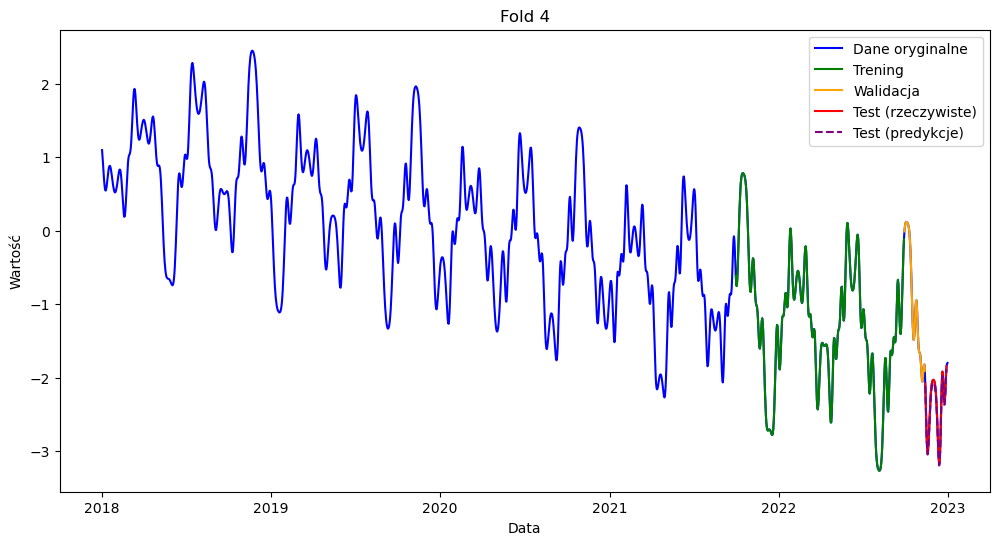

In [36]:
class TimeSeriesDataset(Dataset):
    def __init__(self, df, index, seq_length):
        self.data = torch.tensor(df.loc[index].values).float()
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        return self.data[idx : idx + self.seq_length]  # Zwróć sekwencję


# Definicja modelu LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out)  # Dodajemy Dropout po warstwie LSTM
        out = self.fc(out)
        return out

def create_data_loaders(df, train_index, val_index, test_index, seq_length, batch_size=32):
    train_dataset = TimeSeriesDataset(df, train_index, seq_length)
    val_dataset = TimeSeriesDataset(df, val_index, seq_length)
    test_dataset = TimeSeriesDataset(df, test_index, seq_length)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def train_epoch(model, data_loader, criterion, optimizer):
    model.train()
    train_loss = 0.0

    for batch in data_loader:
        optimizer.zero_grad()
        outputs = model(batch)

        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    return train_loss / len(data_loader)

def evaluate(model, data_loader, criterion):
    model.eval()
    eval_loss = 0.0

    with torch.no_grad():
        for batch in data_loader:
            outputs = model(batch)
            loss = criterion(outputs, batch)
            eval_loss += loss.item()

    return eval_loss / len(data_loader)

# Parametry modelu
# Parametry modelu po optymalizacji hiper paramatrów
input_dim = 1
output_dim = 1  # Przewidywana wartość
num_epochs = 160
# Hiperparametry po optymalizacji
hidden_dim   = 126
num_layers   = 2
lr           = 0.0029889126890169765
dropout_prob = 0.06030346410579783
weight_decay = 0.00018088747372705587
seq_length   = 5
swa_start    = 31

# Trial 32 finished with value: 0.5450767954314983 and parameters: 
#     {'hidden_dim': 160, 'num_layers': 1, 'lerning_opti_rate': 0.004228638269355288,
#      'dropout_prob': 0.09320200205980843, 'weight_decay': 0.00087899591257014,
#      'seq_length': 11, 'swa_start': 29, 'patience_LROnPlateau': 24, 'anneal_epoch_SWALR': 19,
#      'SWALR_lerning_rate': 0.0003637614735082805}. Best is trial 32 with value: 0.5450767954314983.

# Trial 43 finished with value: 0.39798746945245966 and parameters:
#     {'hidden_dim': 179, 'num_layers': 1, 'lerning_opti_rate': 0.004908009003102256,
#      'dropout_prob': 0.06771774575839545, 'weight_decay': 0.000740418501061401,
#      'seq_length': 12, 'swa_start': 27, 'patience_LROnPlateau': 23, 'anneal_epoch_SWALR': 20,
#      'SWALR_lerning_rate': 0.00015811644539494353}. Best is trial 43 with value: 0.39798746945245966.

# Trial 7 finished with value: 0.002525860583773465 and parameters:
#     {'hidden_dim': 126, 'num_layers': 2, 'lerning_opti_rate': 0.0029889126890169765,
#      'dropout_prob': 0.06030346410579783, 'weight_decay': 0.00018088747372705587,
#      'seq_length': 5, 'swa_start': 31, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 15,
#      'SWALR_lerning_rate': 0.0018227668187553957}. Best is trial 7 with value: 0.002525860583773465.

# Tworzenie modelu i optymalizatora
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
swa_model = swa_utils.AveragedModel(model)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

# Funkcja straty i schedulery
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "min", patience=9)
swa_scheduler = swa_utils.SWALR(
    optimizer, anneal_strategy="linear", anneal_epochs=15, swa_lr=0.0018227668187553957
)

total_val_loss = 0.0
total_test_loss = 0.0 


# Iteracja po foldach
for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
    # Wyświetlanie indeksów w jednym wierszu
    val_start_date = train_index[-1] + pd.DateOffset(days=1)  # Zaczynamy dzień po treningu
    val_end_date = test_index[0] - pd.DateOffset(days=1)  # Kończymy dzień przed testem
    val_index = df[(df.index >= val_start_date) & (df.index <= val_end_date)].index

    train_loader, val_loader, test_loader = create_data_loaders(df, train_index, val_index, test_index,seq_length=seq_length)

    best_val_loss = float('inf')  # Dla wczesnego zatrzymania
    patience_counter = 0
    # Trening
    for epoch in range(num_epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer)

        # Walidacja
        val_loss = evaluate(model, val_loader, criterion)
        print(f"Fold {fold+1}, Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        
        # # Wczesne zatrzymanie
        # if val_loss < best_val_loss:
        #     best_val_loss = val_loss
        #     patience_counter = 0
        # else:
        #     patience_counter += 1
        #     if patience_counter >= 8:  # Przerwij po 15 epokach bez poprawy
        #         print(f"Early stopping at epoch {epoch+1}")
        #         break

        if epoch > swa_start:
            swa_model.update_parameters(model)
            swa_scheduler.step()
        else:
            scheduler.step(val_loss)

    # Aktualizacja Batch Normalization i SWA po każdym foldzie
    swa_utils.update_bn(train_loader, swa_model)
    swa_model.update_parameters(model)
    
    # Test (ewaluacja na zbiorze testowym)
    test_loss = evaluate(model, test_loader, criterion)
    print(f"Fold {fold+1}, Test Loss: {test_loss:.4f}")

    # Wizualizacja
    plt.figure(figsize=(12, 6))

    # Oryginalne dane
    plt.plot(df.index, df.values, label="Dane oryginalne", color="blue")

    # Dane treningowe
    plt.plot(train_index, df.loc[train_index], label="Trening", color="green")

    # Dane walidacyjne
    plt.plot(val_index, df.loc[val_index], label="Walidacja", color="orange")

    # Dane testowe i predykcje
    plt.plot(test_index, df.loc[test_index], label="Test (rzeczywiste)", color="red")
    with torch.no_grad():
        test_pred = model(torch.tensor(df.loc[test_index].values).float().unsqueeze(0))
    plt.plot(test_index, test_pred.numpy().flatten(), label="Test (predykcje)", color="purple", linestyle="--")

    plt.xlabel("Data")
    plt.ylabel("Wartość")
    plt.title(f"Fold {fold + 1}")
    plt.legend()
    plt.show()

## Optuna

In [8]:
# class TimeSeriesDataset(Dataset):
#     def __init__(self, df, index, seq_length):
#         self.data = torch.tensor(df.loc[index].values).float()
#         self.seq_length = seq_length

#     def __len__(self):
#         return len(self.data) - self.seq_length

#     def __getitem__(self, idx):
#         return self.data[idx : idx + self.seq_length]  # Zwróć sekwencję


# # Definicja modelu LSTM
# class LSTMModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
#         super().__init__()
#         self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
#         self.dropout = nn.Dropout(dropout_prob)
#         self.fc = nn.Linear(hidden_dim, output_dim)

#     def forward(self, x):
#         out, _ = self.lstm(x)
#         out = self.dropout(out)  # Dodajemy Dropout po warstwie LSTM
#         out = self.fc(out)
#         return out

# def create_data_loaders(df, train_index, val_index, test_index, seq_length, batch_size=32):
#     train_dataset = TimeSeriesDataset(df, train_index, seq_length)
#     val_dataset = TimeSeriesDataset(df, val_index, seq_length)
#     test_dataset = TimeSeriesDataset(df, test_index, seq_length)

#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
#     val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
#     return train_loader, val_loader, test_loader


# def train_epoch(model, data_loader, criterion, optimizer):
#     model.train()
#     train_loss = 0.0

#     for batch in data_loader:
#         optimizer.zero_grad()
#         outputs = model(batch)

#         loss = criterion(outputs, batch)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item()

#     return train_loss / len(data_loader)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     eval_loss = 0.0

#     with torch.no_grad():
#         for batch in data_loader:
#             outputs = model(batch)
#             loss = criterion(outputs, batch)
#             eval_loss += loss.item()

#     return eval_loss / len(data_loader)

# # Parametry modelu
# #seq_length = 10  # Długość sekwencji wejściowej
# input_dim = 1
# output_dim = 1  # Przewidywana wartość
# num_epochs = 160

# def objective(trial: Trial, df, n_splits, fold_size):
#     # Hiperparametry do optymalizacji
#     hidden_dim = trial.suggest_int("hidden_dim", 4, 186)
#     num_layers = trial.suggest_int("num_layers", 1, 3)
#     lr         = trial.suggest_float("lerning_opti", 1e-6, 1e-2)
#     dropout_prob = trial.suggest_float("dropout_prob", 0.0, 0.4)
#     weight_decay = trial.suggest_float("weight_decay", 1e-7, 1e-3)
#     seq_length  =  trial.suggest_int("seq_length", 4, 16)

#     # Tworzenie modelu i optymalizatora
#     model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
#     optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

#     # Funkcja straty i scheduler
#     criterion = nn.MSELoss()
#     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "max", patience=22)

#     total_val_loss = 0.0  # strata walidacyjna
#     total_test_loss = 0.0  # strata testowa
    
#     # Iteracja po foldach
#     for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
        
#         # Obliczanie indeksów walidacyjnych
#         val_start_date = train_index[-1] + pd.DateOffset(days=1)
#         val_end_date = test_index[0] - pd.DateOffset(days=1)
#         val_index = df[(df.index >= val_start_date) & (df.index <= val_end_date)].index

#         # Tworzenie DataLoaderów
#         train_loader, val_loader, test_loader = create_data_loaders(
#             df, train_index, val_index, test_index, seq_length
#         )

#         best_val_loss = float("inf")
#         patience_counter = 0

#         # Trening
#         for epoch in range(num_epochs):
#             train_loss = train_epoch(model, train_loader, criterion, optimizer)
#             val_loss = evaluate(model, val_loader, criterion)
#             test_loss = evaluate(model, test_loader, criterion)

#             # Raportowanie wyniku do Optuny
#             trial.report(val_loss + test_loss, epoch)

#             # Wczesne zatrzymanie przez Optunę
#             # if trial.should_prune():
#             #     raise optuna.exceptions.TrialPruned()

#             # Wczesne zatrzymywanie i zapamiętywanie najlepszego modelu
#             if val_loss < best_val_loss:
#                 best_val_loss = val_loss
#                 patience_counter = 0
#             else:
#                 patience_counter += 1
#                 if patience_counter >= 14:
#                     break
#             total_val_loss += best_val_loss
#             total_test_loss += test_loss
#             scheduler.step(val_loss)

#     avg_val_loss = total_val_loss / n_splits
#     avg_test_loss = total_test_loss / n_splits

#     return avg_val_loss + avg_test_loss
# # Uruchomienie optymalizacji
# study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(n_startup_trials=48), pruner=None) 
# study.optimize(lambda trial: objective(trial, df, n_splits, fold_size), n_trials=30)  

# print("Najlepsze hiperparametry:", study.best_params)
# fig = optuna.visualization.plot_parallel_coordinate(study)
# fig.show()

## Optuna V2

In [ ]:
class TimeSeriesDataset(Dataset):
    def __init__(self, df, index, seq_length):
        self.data = torch.tensor(df.loc[index].values).float()
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        return self.data[idx : idx + self.seq_length]  # Zwróć sekwencję


# Definicja modelu LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out)  # Dodajemy Dropout po warstwie LSTM
        out = self.fc(out)
        return out

def create_data_loaders(df, train_index, val_index, test_index, seq_length, batch_size=32):
    train_dataset = TimeSeriesDataset(df, train_index, seq_length)
    val_dataset = TimeSeriesDataset(df, val_index, seq_length)
    test_dataset = TimeSeriesDataset(df, test_index, seq_length)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader


def train_epoch(model, data_loader, criterion, optimizer):
    model.train()
    train_loss = 0.0

    for batch in data_loader:
        optimizer.zero_grad()
        outputs = model(batch)

        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    return train_loss / len(data_loader)

def evaluate(model, data_loader, criterion):
    model.eval()
    eval_loss = 0.0

    with torch.no_grad():
        for batch in data_loader:
            outputs = model(batch)
            
            loss = criterion(outputs, batch)
            eval_loss += loss.item()

    return eval_loss / len(data_loader)

# Parametry modelu
#seq_length = 10  # Długość sekwencji wejściowej
input_dim = 1
output_dim = 1  # Przewidywana wartość
num_epochs = 160

def objective(trial: Trial, df, n_splits, fold_size):
    # Hiperparametry do optymalizacji
    hidden_dim   = trial.suggest_int("hidden_dim", 4, 186)
    num_layers   = trial.suggest_int("num_layers", 1, 3)
    lr            = trial.suggest_float("lerning_opti_rate", 1e-6, 1e-2)
    dropout_prob  = trial.suggest_float("dropout_prob", 0.0, 0.35)
    weight_decay  = trial.suggest_float("weight_decay", 1e-7, 1e-3)
    seq_length    = trial.suggest_int("seq_length", 4, 16)
    swa_start     = trial.suggest_int("swa_start", 20, 50)  
    patience      = trial.suggest_int('patience_LROnPlateau', 6, 24 )
    anneal_epochs = trial.suggest_int('anneal_epoch_SWALR', 6 , 24 )
    swa_lr        = trial.suggest_float("SWALR_lerning_rate", 1e-6, 5e-2)

    total_val_loss = 0.0
    total_test_loss = 0.0
    
    # Iteration through folds
    for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
        # Print indexes in one line
        val_start_date = train_index[-1] + pd.DateOffset(days=1)  # Start the day after training
        val_end_date = test_index[0] - pd.DateOffset(days=1)  # End the day before testing
        val_index = df[(df.index >= val_start_date) & (df.index <= val_end_date)].index

        # Ensure consistent data loaders for each trial and avoid shuffling for validation and test
        train_loader, val_loader, test_loader = create_data_loaders(df, train_index, val_index, test_index, seq_length=seq_length)

        # Reset Model State - NEW
        model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
        swa_model = swa_utils.AveragedModel(model)

        # Reset Optimizer State - NEW
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "min", patience=patience)
        swa_scheduler = swa_utils.SWALR(optimizer, anneal_strategy="linear", anneal_epochs=anneal_epochs, swa_lr=swa_lr)

        best_val_loss = float('inf')  # For early stopping

        # Training 
        for epoch in range(num_epochs):
            train_loss = train_epoch(model, train_loader, criterion, optimizer)
            val_loss = evaluate(model, val_loader, criterion)
            
            # Update lr, but only for one scheduler         
            if epoch > swa_start:
                swa_model.update_parameters(model)
                swa_scheduler.step()
            else:
                scheduler.step(val_loss)
            
            trial.report(val_loss, epoch)  # Report validation loss at each epoch

        # Update Batch Normalization and SWA after each fold
        swa_model.update_parameters(model)
        swa_utils.update_bn(train_loader, swa_model)  
        
        # Evaluation (on the test set)
        val_loss = evaluate(swa_model, val_loader, criterion)
        test_loss = evaluate(swa_model, test_loader, criterion)

        print(f"Trial {trial.number}, Fold {fold}, Final Val Loss: {val_loss:.4f}, Walidacja: od {val_start_date.date()} do {val_end_date.date()}")
        print(f"Trial {trial.number}, Fold {fold}, Final Test Loss: {test_loss:.4f}, Test: od {test_index[0].date()} do {test_index[-1].date()} ")


        # Report validation and test loss after each fold
        trial.set_user_attr(f"val_loss_fold_{fold}", val_loss)
        trial.set_user_attr(f"test_loss_fold_{fold}", test_loss)

        trial.report(val_loss, fold)  # Include both losses
        trial.report(test_loss, fold)
        
        total_val_loss += val_loss
        total_test_loss += test_loss

    return total_val_loss + total_test_loss

# Uruchomienie optymalizacji
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(n_startup_trials=28), pruner=optuna.pruners.HyperbandPruner())
study.optimize(lambda trial: objective(trial, df, n_splits, fold_size), n_trials=1000)

print("Najlepsze hiperparametry:", study.best_params)
print("Najlepsze wartości metryk:", study.best_values)

fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show()

[I 2024-06-07 11:52:49,075] A new study created in memory with name: no-name-0d7128c1-4461-4ae2-bccc-ec47ead1f605


Trial 0, Fold 0, Final Val Loss: 0.0389, Walidacja: od 2018-12-31 do 2019-02-13
Trial 0, Fold 0, Final Test Loss: 0.0034, Test: od 2019-02-14 do 2019-04-01 
Trial 0, Fold 1, Final Val Loss: 0.0078, Walidacja: od 2020-03-31 do 2020-05-14
Trial 0, Fold 1, Final Test Loss: 0.0014, Test: od 2020-05-15 do 2020-06-30 
Trial 0, Fold 2, Final Val Loss: 0.0093, Walidacja: od 2021-06-30 do 2021-08-13
Trial 0, Fold 2, Final Test Loss: 0.0059, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:53:04,566] Trial 0 finished with value: 0.06942614084982779 and parameters: {'hidden_dim': 37, 'num_layers': 2, 'lerning_opti_rate': 0.001969936183384091, 'dropout_prob': 0.192461661313683, 'weight_decay': 0.00072912573814563, 'seq_length': 12, 'swa_start': 41, 'patience_LROnPlateau': 21, 'anneal_epoch_SWALR': 14, 'SWALR_lerning_rate': 0.027873315290048866}. Best is trial 0 with value: 0.06942614084982779.


Trial 0, Fold 3, Final Val Loss: 0.0007, Walidacja: od 2022-09-29 do 2022-11-12
Trial 0, Fold 3, Final Test Loss: 0.0020, Test: od 2022-11-13 do 2022-12-29 
Trial 1, Fold 0, Final Val Loss: 0.4669, Walidacja: od 2018-12-31 do 2019-02-13
Trial 1, Fold 0, Final Test Loss: 0.0063, Test: od 2019-02-14 do 2019-04-01 
Trial 1, Fold 1, Final Val Loss: 0.0418, Walidacja: od 2020-03-31 do 2020-05-14
Trial 1, Fold 1, Final Test Loss: 0.0090, Test: od 2020-05-15 do 2020-06-30 
Trial 1, Fold 2, Final Val Loss: 0.0043, Walidacja: od 2021-06-30 do 2021-08-13
Trial 1, Fold 2, Final Test Loss: 0.0076, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:54:37,023] Trial 1 finished with value: 0.5425333552993834 and parameters: {'hidden_dim': 125, 'num_layers': 3, 'lerning_opti_rate': 0.008726050154841933, 'dropout_prob': 0.2758032235226083, 'weight_decay': 0.000835414124337473, 'seq_length': 15, 'swa_start': 23, 'patience_LROnPlateau': 22, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.027236905205671822}. Best is trial 0 with value: 0.06942614084982779.


Trial 1, Fold 3, Final Val Loss: 0.0034, Walidacja: od 2022-09-29 do 2022-11-12
Trial 1, Fold 3, Final Test Loss: 0.0031, Test: od 2022-11-13 do 2022-12-29 
Trial 2, Fold 0, Final Val Loss: 0.0148, Walidacja: od 2018-12-31 do 2019-02-13
Trial 2, Fold 0, Final Test Loss: 0.0003, Test: od 2019-02-14 do 2019-04-01 
Trial 2, Fold 1, Final Val Loss: 0.0021, Walidacja: od 2020-03-31 do 2020-05-14
Trial 2, Fold 1, Final Test Loss: 0.0005, Test: od 2020-05-15 do 2020-06-30 
Trial 2, Fold 2, Final Val Loss: 0.0004, Walidacja: od 2021-06-30 do 2021-08-13
Trial 2, Fold 2, Final Test Loss: 0.0016, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:54:45,785] Trial 2 finished with value: 0.027868273289641365 and parameters: {'hidden_dim': 30, 'num_layers': 1, 'lerning_opti_rate': 0.00024684518453556325, 'dropout_prob': 0.1506603214549665, 'weight_decay': 0.0009225840247974889, 'seq_length': 16, 'swa_start': 36, 'patience_LROnPlateau': 22, 'anneal_epoch_SWALR': 12, 'SWALR_lerning_rate': 0.015537174945282598}. Best is trial 2 with value: 0.027868273289641365.


Trial 2, Fold 3, Final Val Loss: 0.0012, Walidacja: od 2022-09-29 do 2022-11-12
Trial 2, Fold 3, Final Test Loss: 0.0069, Test: od 2022-11-13 do 2022-12-29 
Trial 3, Fold 0, Final Val Loss: 0.0035, Walidacja: od 2018-12-31 do 2019-02-13
Trial 3, Fold 0, Final Test Loss: 0.0001, Test: od 2019-02-14 do 2019-04-01 
Trial 3, Fold 1, Final Val Loss: 0.0011, Walidacja: od 2020-03-31 do 2020-05-14
Trial 3, Fold 1, Final Test Loss: 0.0002, Test: od 2020-05-15 do 2020-06-30 
Trial 3, Fold 2, Final Val Loss: 0.0004, Walidacja: od 2021-06-30 do 2021-08-13
Trial 3, Fold 2, Final Test Loss: 0.0005, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:54:53,988] Trial 3 finished with value: 0.007932563695248973 and parameters: {'hidden_dim': 28, 'num_layers': 1, 'lerning_opti_rate': 0.00647156823020431, 'dropout_prob': 0.18483351815529203, 'weight_decay': 0.0007108450891770587, 'seq_length': 9, 'swa_start': 24, 'patience_LROnPlateau': 13, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.013123423637970049}. Best is trial 3 with value: 0.007932563695248973.


Trial 3, Fold 3, Final Val Loss: 0.0011, Walidacja: od 2022-09-29 do 2022-11-12
Trial 3, Fold 3, Final Test Loss: 0.0009, Test: od 2022-11-13 do 2022-12-29 
Trial 4, Fold 0, Final Val Loss: 0.0252, Walidacja: od 2018-12-31 do 2019-02-13
Trial 4, Fold 0, Final Test Loss: 0.0004, Test: od 2019-02-14 do 2019-04-01 
Trial 4, Fold 1, Final Val Loss: 0.0047, Walidacja: od 2020-03-31 do 2020-05-14
Trial 4, Fold 1, Final Test Loss: 0.0032, Test: od 2020-05-15 do 2020-06-30 
Trial 4, Fold 2, Final Val Loss: 0.0025, Walidacja: od 2021-06-30 do 2021-08-13
Trial 4, Fold 2, Final Test Loss: 0.0030, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:55:37,223] Trial 4 finished with value: 0.040038042003288865 and parameters: {'hidden_dim': 76, 'num_layers': 2, 'lerning_opti_rate': 0.0037511597067209313, 'dropout_prob': 0.11104592298616044, 'weight_decay': 0.0008397817182186224, 'seq_length': 14, 'swa_start': 36, 'patience_LROnPlateau': 7, 'anneal_epoch_SWALR': 14, 'SWALR_lerning_rate': 0.013564200720790459}. Best is trial 3 with value: 0.007932563695248973.


Trial 4, Fold 3, Final Val Loss: 0.0004, Walidacja: od 2022-09-29 do 2022-11-12
Trial 4, Fold 3, Final Test Loss: 0.0007, Test: od 2022-11-13 do 2022-12-29 
Trial 5, Fold 0, Final Val Loss: 0.0324, Walidacja: od 2018-12-31 do 2019-02-13
Trial 5, Fold 0, Final Test Loss: 0.0049, Test: od 2019-02-14 do 2019-04-01 
Trial 5, Fold 1, Final Val Loss: 0.0004, Walidacja: od 2020-03-31 do 2020-05-14
Trial 5, Fold 1, Final Test Loss: 0.0007, Test: od 2020-05-15 do 2020-06-30 
Trial 5, Fold 2, Final Val Loss: 0.0093, Walidacja: od 2021-06-30 do 2021-08-13
Trial 5, Fold 2, Final Test Loss: 0.0088, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:55:55,189] Trial 5 finished with value: 0.05865383199125063 and parameters: {'hidden_dim': 159, 'num_layers': 1, 'lerning_opti_rate': 0.0049588485130349315, 'dropout_prob': 0.318078221665064, 'weight_decay': 0.0008302467576276199, 'seq_length': 4, 'swa_start': 37, 'patience_LROnPlateau': 24, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.01905320421509549}. Best is trial 3 with value: 0.007932563695248973.


Trial 5, Fold 3, Final Val Loss: 0.0007, Walidacja: od 2022-09-29 do 2022-11-12
Trial 5, Fold 3, Final Test Loss: 0.0016, Test: od 2022-11-13 do 2022-12-29 
Trial 6, Fold 0, Final Val Loss: 0.0017, Walidacja: od 2018-12-31 do 2019-02-13
Trial 6, Fold 0, Final Test Loss: 0.0001, Test: od 2019-02-14 do 2019-04-01 
Trial 6, Fold 1, Final Val Loss: 0.0011, Walidacja: od 2020-03-31 do 2020-05-14
Trial 6, Fold 1, Final Test Loss: 0.0008, Test: od 2020-05-15 do 2020-06-30 
Trial 6, Fold 2, Final Val Loss: 0.0004, Walidacja: od 2021-06-30 do 2021-08-13
Trial 6, Fold 2, Final Test Loss: 0.0004, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:56:12,317] Trial 6 finished with value: 0.006053567826256767 and parameters: {'hidden_dim': 105, 'num_layers': 1, 'lerning_opti_rate': 0.0009220140198122208, 'dropout_prob': 0.04260215413192797, 'weight_decay': 0.0003198996189472602, 'seq_length': 6, 'swa_start': 32, 'patience_LROnPlateau': 17, 'anneal_epoch_SWALR': 18, 'SWALR_lerning_rate': 0.011579911955315218}. Best is trial 6 with value: 0.006053567826256767.


Trial 6, Fold 3, Final Val Loss: 0.0008, Walidacja: od 2022-09-29 do 2022-11-12
Trial 6, Fold 3, Final Test Loss: 0.0007, Test: od 2022-11-13 do 2022-12-29 
Trial 7, Fold 0, Final Val Loss: 0.0666, Walidacja: od 2018-12-31 do 2019-02-13
Trial 7, Fold 0, Final Test Loss: 0.0005, Test: od 2019-02-14 do 2019-04-01 
Trial 7, Fold 1, Final Val Loss: 0.0307, Walidacja: od 2020-03-31 do 2020-05-14
Trial 7, Fold 1, Final Test Loss: 0.0032, Test: od 2020-05-15 do 2020-06-30 
Trial 7, Fold 2, Final Val Loss: 0.0021, Walidacja: od 2021-06-30 do 2021-08-13
Trial 7, Fold 2, Final Test Loss: 0.0024, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:56:31,068] Trial 7 finished with value: 0.11149661932722665 and parameters: {'hidden_dim': 34, 'num_layers': 3, 'lerning_opti_rate': 0.006428246450495138, 'dropout_prob': 0.17197154672437207, 'weight_decay': 0.0005859291212939031, 'seq_length': 5, 'swa_start': 36, 'patience_LROnPlateau': 23, 'anneal_epoch_SWALR': 7, 'SWALR_lerning_rate': 0.04137980454144172}. Best is trial 6 with value: 0.006053567826256767.


Trial 7, Fold 3, Final Val Loss: 0.0033, Walidacja: od 2022-09-29 do 2022-11-12
Trial 7, Fold 3, Final Test Loss: 0.0028, Test: od 2022-11-13 do 2022-12-29 
Trial 8, Fold 0, Final Val Loss: 0.0307, Walidacja: od 2018-12-31 do 2019-02-13
Trial 8, Fold 0, Final Test Loss: 0.0044, Test: od 2019-02-14 do 2019-04-01 
Trial 8, Fold 1, Final Val Loss: 0.0219, Walidacja: od 2020-03-31 do 2020-05-14
Trial 8, Fold 1, Final Test Loss: 0.0048, Test: od 2020-05-15 do 2020-06-30 
Trial 8, Fold 2, Final Val Loss: 0.0093, Walidacja: od 2021-06-30 do 2021-08-13
Trial 8, Fold 2, Final Test Loss: 0.0071, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:57:11,993] Trial 8 finished with value: 0.10594059464347083 and parameters: {'hidden_dim': 67, 'num_layers': 2, 'lerning_opti_rate': 0.00874053565907319, 'dropout_prob': 0.1237402719677633, 'weight_decay': 0.0009826283484279886, 'seq_length': 12, 'swa_start': 38, 'patience_LROnPlateau': 20, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.04149983116278375}. Best is trial 6 with value: 0.006053567826256767.


Trial 8, Fold 3, Final Val Loss: 0.0052, Walidacja: od 2022-09-29 do 2022-11-12
Trial 8, Fold 3, Final Test Loss: 0.0225, Test: od 2022-11-13 do 2022-12-29 
Trial 9, Fold 0, Final Val Loss: 0.0117, Walidacja: od 2018-12-31 do 2019-02-13
Trial 9, Fold 0, Final Test Loss: 0.0013, Test: od 2019-02-14 do 2019-04-01 
Trial 9, Fold 1, Final Val Loss: 0.0002, Walidacja: od 2020-03-31 do 2020-05-14
Trial 9, Fold 1, Final Test Loss: 0.0002, Test: od 2020-05-15 do 2020-06-30 
Trial 9, Fold 2, Final Val Loss: 0.0004, Walidacja: od 2021-06-30 do 2021-08-13
Trial 9, Fold 2, Final Test Loss: 0.0004, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:57:25,600] Trial 9 finished with value: 0.017835347643995192 and parameters: {'hidden_dim': 24, 'num_layers': 2, 'lerning_opti_rate': 0.007088220433118336, 'dropout_prob': 0.2344125030669077, 'weight_decay': 9.946914212314492e-05, 'seq_length': 7, 'swa_start': 34, 'patience_LROnPlateau': 8, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.012245759243925023}. Best is trial 6 with value: 0.006053567826256767.


Trial 9, Fold 3, Final Val Loss: 0.0014, Walidacja: od 2022-09-29 do 2022-11-12
Trial 9, Fold 3, Final Test Loss: 0.0021, Test: od 2022-11-13 do 2022-12-29 
Trial 10, Fold 0, Final Val Loss: 0.0092, Walidacja: od 2018-12-31 do 2019-02-13
Trial 10, Fold 0, Final Test Loss: 0.0013, Test: od 2019-02-14 do 2019-04-01 
Trial 10, Fold 1, Final Val Loss: 0.0009, Walidacja: od 2020-03-31 do 2020-05-14
Trial 10, Fold 1, Final Test Loss: 0.0013, Test: od 2020-05-15 do 2020-06-30 
Trial 10, Fold 2, Final Val Loss: 0.0115, Walidacja: od 2021-06-30 do 2021-08-13
Trial 10, Fold 2, Final Test Loss: 0.0105, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:57:48,697] Trial 10 finished with value: 0.06614800987881608 and parameters: {'hidden_dim': 183, 'num_layers': 1, 'lerning_opti_rate': 0.0015765683217450553, 'dropout_prob': 0.25008499552991986, 'weight_decay': 0.0005067809644523054, 'seq_length': 6, 'swa_start': 21, 'patience_LROnPlateau': 24, 'anneal_epoch_SWALR': 17, 'SWALR_lerning_rate': 0.02006040176981514}. Best is trial 6 with value: 0.006053567826256767.


Trial 10, Fold 3, Final Val Loss: 0.0083, Walidacja: od 2022-09-29 do 2022-11-12
Trial 10, Fold 3, Final Test Loss: 0.0231, Test: od 2022-11-13 do 2022-12-29 
Trial 11, Fold 0, Final Val Loss: 0.0603, Walidacja: od 2018-12-31 do 2019-02-13
Trial 11, Fold 0, Final Test Loss: 0.0020, Test: od 2019-02-14 do 2019-04-01 
Trial 11, Fold 1, Final Val Loss: 0.0252, Walidacja: od 2020-03-31 do 2020-05-14
Trial 11, Fold 1, Final Test Loss: 0.0056, Test: od 2020-05-15 do 2020-06-30 
Trial 11, Fold 2, Final Val Loss: 0.0155, Walidacja: od 2021-06-30 do 2021-08-13
Trial 11, Fold 2, Final Test Loss: 0.0135, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:58:36,839] Trial 11 finished with value: 0.14039874091395177 and parameters: {'hidden_dim': 123, 'num_layers': 3, 'lerning_opti_rate': 0.0016171792290041028, 'dropout_prob': 0.2228045904568306, 'weight_decay': 0.0007342082818515268, 'seq_length': 4, 'swa_start': 45, 'patience_LROnPlateau': 15, 'anneal_epoch_SWALR': 19, 'SWALR_lerning_rate': 0.0238504754659853}. Best is trial 6 with value: 0.006053567826256767.


Trial 11, Fold 3, Final Val Loss: 0.0074, Walidacja: od 2022-09-29 do 2022-11-12
Trial 11, Fold 3, Final Test Loss: 0.0109, Test: od 2022-11-13 do 2022-12-29 
Trial 12, Fold 0, Final Val Loss: 0.0761, Walidacja: od 2018-12-31 do 2019-02-13
Trial 12, Fold 0, Final Test Loss: 0.0010, Test: od 2019-02-14 do 2019-04-01 
Trial 12, Fold 1, Final Val Loss: 0.0028, Walidacja: od 2020-03-31 do 2020-05-14
Trial 12, Fold 1, Final Test Loss: 0.0005, Test: od 2020-05-15 do 2020-06-30 
Trial 12, Fold 2, Final Val Loss: 0.0005, Walidacja: od 2021-06-30 do 2021-08-13
Trial 12, Fold 2, Final Test Loss: 0.0005, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:59:38,087] Trial 12 finished with value: 0.08843049088682164 and parameters: {'hidden_dim': 147, 'num_layers': 3, 'lerning_opti_rate': 0.00978316886931905, 'dropout_prob': 0.2907385782315174, 'weight_decay': 0.0006357508373669243, 'seq_length': 6, 'swa_start': 26, 'patience_LROnPlateau': 24, 'anneal_epoch_SWALR': 18, 'SWALR_lerning_rate': 0.010617993686100155}. Best is trial 6 with value: 0.006053567826256767.


Trial 12, Fold 3, Final Val Loss: 0.0028, Walidacja: od 2022-09-29 do 2022-11-12
Trial 12, Fold 3, Final Test Loss: 0.0043, Test: od 2022-11-13 do 2022-12-29 
Trial 13, Fold 0, Final Val Loss: 0.0017, Walidacja: od 2018-12-31 do 2019-02-13
Trial 13, Fold 0, Final Test Loss: 0.0000, Test: od 2019-02-14 do 2019-04-01 
Trial 13, Fold 1, Final Val Loss: 0.0006, Walidacja: od 2020-03-31 do 2020-05-14
Trial 13, Fold 1, Final Test Loss: 0.0002, Test: od 2020-05-15 do 2020-06-30 
Trial 13, Fold 2, Final Val Loss: 0.0004, Walidacja: od 2021-06-30 do 2021-08-13
Trial 13, Fold 2, Final Test Loss: 0.0004, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 11:59:54,632] Trial 13 finished with value: 0.004624864925062866 and parameters: {'hidden_dim': 50, 'num_layers': 1, 'lerning_opti_rate': 0.007228050497961932, 'dropout_prob': 0.2534808939956861, 'weight_decay': 0.0005576304751976042, 'seq_length': 11, 'swa_start': 29, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 6, 'SWALR_lerning_rate': 0.007558424601671899}. Best is trial 13 with value: 0.004624864925062866.


Trial 13, Fold 3, Final Val Loss: 0.0006, Walidacja: od 2022-09-29 do 2022-11-12
Trial 13, Fold 3, Final Test Loss: 0.0006, Test: od 2022-11-13 do 2022-12-29 
Trial 14, Fold 0, Final Val Loss: 0.0080, Walidacja: od 2018-12-31 do 2019-02-13
Trial 14, Fold 0, Final Test Loss: 0.0004, Test: od 2019-02-14 do 2019-04-01 
Trial 14, Fold 1, Final Val Loss: 0.0018, Walidacja: od 2020-03-31 do 2020-05-14
Trial 14, Fold 1, Final Test Loss: 0.0003, Test: od 2020-05-15 do 2020-06-30 
Trial 14, Fold 2, Final Val Loss: 0.0004, Walidacja: od 2021-06-30 do 2021-08-13
Trial 14, Fold 2, Final Test Loss: 0.0006, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:00:01,999] Trial 14 finished with value: 0.015284430770407198 and parameters: {'hidden_dim': 15, 'num_layers': 1, 'lerning_opti_rate': 0.009407213713673064, 'dropout_prob': 0.14251816211312807, 'weight_decay': 0.00017270280531632415, 'seq_length': 7, 'swa_start': 50, 'patience_LROnPlateau': 11, 'anneal_epoch_SWALR': 18, 'SWALR_lerning_rate': 0.010103061666243425}. Best is trial 13 with value: 0.004624864925062866.


Trial 14, Fold 3, Final Val Loss: 0.0017, Walidacja: od 2022-09-29 do 2022-11-12
Trial 14, Fold 3, Final Test Loss: 0.0020, Test: od 2022-11-13 do 2022-12-29 
Trial 15, Fold 0, Final Val Loss: 0.0244, Walidacja: od 2018-12-31 do 2019-02-13
Trial 15, Fold 0, Final Test Loss: 0.0007, Test: od 2019-02-14 do 2019-04-01 
Trial 15, Fold 1, Final Val Loss: 0.0145, Walidacja: od 2020-03-31 do 2020-05-14
Trial 15, Fold 1, Final Test Loss: 0.0057, Test: od 2020-05-15 do 2020-06-30 
Trial 15, Fold 2, Final Val Loss: 0.0047, Walidacja: od 2021-06-30 do 2021-08-13
Trial 15, Fold 2, Final Test Loss: 0.0040, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:00:18,204] Trial 15 finished with value: 0.05600164753559511 and parameters: {'hidden_dim': 106, 'num_layers': 1, 'lerning_opti_rate': 0.005041284639807106, 'dropout_prob': 0.12836323939417624, 'weight_decay': 0.0008056707918489969, 'seq_length': 5, 'swa_start': 48, 'patience_LROnPlateau': 12, 'anneal_epoch_SWALR': 8, 'SWALR_lerning_rate': 0.03348180521868729}. Best is trial 13 with value: 0.004624864925062866.


Trial 15, Fold 3, Final Val Loss: 0.0005, Walidacja: od 2022-09-29 do 2022-11-12
Trial 15, Fold 3, Final Test Loss: 0.0014, Test: od 2022-11-13 do 2022-12-29 
Trial 16, Fold 0, Final Val Loss: 0.0335, Walidacja: od 2018-12-31 do 2019-02-13
Trial 16, Fold 0, Final Test Loss: 0.0010, Test: od 2019-02-14 do 2019-04-01 
Trial 16, Fold 1, Final Val Loss: 0.0005, Walidacja: od 2020-03-31 do 2020-05-14
Trial 16, Fold 1, Final Test Loss: 0.0006, Test: od 2020-05-15 do 2020-06-30 
Trial 16, Fold 2, Final Val Loss: 0.0013, Walidacja: od 2021-06-30 do 2021-08-13
Trial 16, Fold 2, Final Test Loss: 0.0013, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:00:32,440] Trial 16 finished with value: 0.0402123258827487 and parameters: {'hidden_dim': 50, 'num_layers': 1, 'lerning_opti_rate': 0.009590345108879501, 'dropout_prob': 0.07329921583353363, 'weight_decay': 0.0009106978419878249, 'seq_length': 8, 'swa_start': 37, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.03105402455268602}. Best is trial 13 with value: 0.004624864925062866.


Trial 16, Fold 3, Final Val Loss: 0.0007, Walidacja: od 2022-09-29 do 2022-11-12
Trial 16, Fold 3, Final Test Loss: 0.0013, Test: od 2022-11-13 do 2022-12-29 
Trial 17, Fold 0, Final Val Loss: 0.0573, Walidacja: od 2018-12-31 do 2019-02-13
Trial 17, Fold 0, Final Test Loss: 0.0011, Test: od 2019-02-14 do 2019-04-01 
Trial 17, Fold 1, Final Val Loss: 0.0029, Walidacja: od 2020-03-31 do 2020-05-14
Trial 17, Fold 1, Final Test Loss: 0.0018, Test: od 2020-05-15 do 2020-06-30 
Trial 17, Fold 2, Final Val Loss: 0.0025, Walidacja: od 2021-06-30 do 2021-08-13
Trial 17, Fold 2, Final Test Loss: 0.0015, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:00:46,387] Trial 17 finished with value: 0.07486206651083194 and parameters: {'hidden_dim': 5, 'num_layers': 3, 'lerning_opti_rate': 0.007508597405940468, 'dropout_prob': 0.03497052505402455, 'weight_decay': 0.0003495726677194818, 'seq_length': 14, 'swa_start': 31, 'patience_LROnPlateau': 18, 'anneal_epoch_SWALR': 6, 'SWALR_lerning_rate': 0.04021060957170591}. Best is trial 13 with value: 0.004624864925062866.


Trial 17, Fold 3, Final Val Loss: 0.0016, Walidacja: od 2022-09-29 do 2022-11-12
Trial 17, Fold 3, Final Test Loss: 0.0061, Test: od 2022-11-13 do 2022-12-29 
Trial 18, Fold 0, Final Val Loss: 0.0019, Walidacja: od 2018-12-31 do 2019-02-13
Trial 18, Fold 0, Final Test Loss: 0.0001, Test: od 2019-02-14 do 2019-04-01 
Trial 18, Fold 1, Final Val Loss: 0.0007, Walidacja: od 2020-03-31 do 2020-05-14
Trial 18, Fold 1, Final Test Loss: 0.0001, Test: od 2020-05-15 do 2020-06-30 
Trial 18, Fold 2, Final Val Loss: 0.0001, Walidacja: od 2021-06-30 do 2021-08-13
Trial 18, Fold 2, Final Test Loss: 0.0002, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:01:23,991] Trial 18 finished with value: 0.004220783559503616 and parameters: {'hidden_dim': 71, 'num_layers': 2, 'lerning_opti_rate': 0.006801521696951506, 'dropout_prob': 0.09387183708107863, 'weight_decay': 0.0008904935769651118, 'seq_length': 12, 'swa_start': 30, 'patience_LROnPlateau': 19, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.0010154656450477727}. Best is trial 18 with value: 0.004220783559503616.


Trial 18, Fold 3, Final Val Loss: 0.0003, Walidacja: od 2022-09-29 do 2022-11-12
Trial 18, Fold 3, Final Test Loss: 0.0009, Test: od 2022-11-13 do 2022-12-29 
Trial 19, Fold 0, Final Val Loss: 0.0415, Walidacja: od 2018-12-31 do 2019-02-13
Trial 19, Fold 0, Final Test Loss: 0.0032, Test: od 2019-02-14 do 2019-04-01 
Trial 19, Fold 1, Final Val Loss: 0.0013, Walidacja: od 2020-03-31 do 2020-05-14
Trial 19, Fold 1, Final Test Loss: 0.0004, Test: od 2020-05-15 do 2020-06-30 
Trial 19, Fold 2, Final Val Loss: 0.0006, Walidacja: od 2021-06-30 do 2021-08-13
Trial 19, Fold 2, Final Test Loss: 0.0006, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:01:40,088] Trial 19 finished with value: 0.049597608944168314 and parameters: {'hidden_dim': 44, 'num_layers': 2, 'lerning_opti_rate': 0.00235506360272915, 'dropout_prob': 0.006310313876257995, 'weight_decay': 0.0006960877003605797, 'seq_length': 14, 'swa_start': 23, 'patience_LROnPlateau': 16, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.03163702180138588}. Best is trial 18 with value: 0.004220783559503616.


Trial 19, Fold 3, Final Val Loss: 0.0009, Walidacja: od 2022-09-29 do 2022-11-12
Trial 19, Fold 3, Final Test Loss: 0.0011, Test: od 2022-11-13 do 2022-12-29 
Trial 20, Fold 0, Final Val Loss: 0.0215, Walidacja: od 2018-12-31 do 2019-02-13
Trial 20, Fold 0, Final Test Loss: 0.0039, Test: od 2019-02-14 do 2019-04-01 
Trial 20, Fold 1, Final Val Loss: 0.0067, Walidacja: od 2020-03-31 do 2020-05-14
Trial 20, Fold 1, Final Test Loss: 0.0040, Test: od 2020-05-15 do 2020-06-30 
Trial 20, Fold 2, Final Val Loss: 0.0047, Walidacja: od 2021-06-30 do 2021-08-13
Trial 20, Fold 2, Final Test Loss: 0.0056, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:01:59,465] Trial 20 finished with value: 0.058363279211334884 and parameters: {'hidden_dim': 48, 'num_layers': 1, 'lerning_opti_rate': 0.005795901223569873, 'dropout_prob': 0.29435548662636024, 'weight_decay': 0.0005342345688982051, 'seq_length': 13, 'swa_start': 48, 'patience_LROnPlateau': 24, 'anneal_epoch_SWALR': 22, 'SWALR_lerning_rate': 0.04279694906104743}. Best is trial 18 with value: 0.004220783559503616.


Trial 20, Fold 3, Final Val Loss: 0.0018, Walidacja: od 2022-09-29 do 2022-11-12
Trial 20, Fold 3, Final Test Loss: 0.0101, Test: od 2022-11-13 do 2022-12-29 
Trial 21, Fold 0, Final Val Loss: 0.0786, Walidacja: od 2018-12-31 do 2019-02-13
Trial 21, Fold 0, Final Test Loss: 0.0029, Test: od 2019-02-14 do 2019-04-01 
Trial 21, Fold 1, Final Val Loss: 0.0174, Walidacja: od 2020-03-31 do 2020-05-14
Trial 21, Fold 1, Final Test Loss: 0.0017, Test: od 2020-05-15 do 2020-06-30 
Trial 21, Fold 2, Final Val Loss: 0.0013, Walidacja: od 2021-06-30 do 2021-08-13
Trial 21, Fold 2, Final Test Loss: 0.0013, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:02:09,566] Trial 21 finished with value: 0.1124792491318658 and parameters: {'hidden_dim': 5, 'num_layers': 2, 'lerning_opti_rate': 0.0009688917871238385, 'dropout_prob': 0.23246073404633957, 'weight_decay': 0.0007623221706305124, 'seq_length': 7, 'swa_start': 47, 'patience_LROnPlateau': 13, 'anneal_epoch_SWALR': 16, 'SWALR_lerning_rate': 0.0253459190571561}. Best is trial 18 with value: 0.004220783559503616.


Trial 21, Fold 3, Final Val Loss: 0.0032, Walidacja: od 2022-09-29 do 2022-11-12
Trial 21, Fold 3, Final Test Loss: 0.0060, Test: od 2022-11-13 do 2022-12-29 
Trial 22, Fold 0, Final Val Loss: 0.2056, Walidacja: od 2018-12-31 do 2019-02-13
Trial 22, Fold 0, Final Test Loss: 0.0791, Test: od 2019-02-14 do 2019-04-01 
Trial 22, Fold 1, Final Val Loss: 0.0484, Walidacja: od 2020-03-31 do 2020-05-14
Trial 22, Fold 1, Final Test Loss: 0.0115, Test: od 2020-05-15 do 2020-06-30 
Trial 22, Fold 2, Final Val Loss: 0.0152, Walidacja: od 2021-06-30 do 2021-08-13
Trial 22, Fold 2, Final Test Loss: 0.0116, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:02:58,431] Trial 22 finished with value: 0.6149557193275541 and parameters: {'hidden_dim': 150, 'num_layers': 2, 'lerning_opti_rate': 0.00904705779059504, 'dropout_prob': 0.2585697503728028, 'weight_decay': 0.000679147540604332, 'seq_length': 11, 'swa_start': 44, 'patience_LROnPlateau': 18, 'anneal_epoch_SWALR': 21, 'SWALR_lerning_rate': 0.0460228121503321}. Best is trial 18 with value: 0.004220783559503616.


Trial 22, Fold 3, Final Val Loss: 0.0914, Walidacja: od 2022-09-29 do 2022-11-12
Trial 22, Fold 3, Final Test Loss: 0.1522, Test: od 2022-11-13 do 2022-12-29 
Trial 23, Fold 0, Final Val Loss: 0.0527, Walidacja: od 2018-12-31 do 2019-02-13
Trial 23, Fold 0, Final Test Loss: 0.0003, Test: od 2019-02-14 do 2019-04-01 
Trial 23, Fold 1, Final Val Loss: 0.0029, Walidacja: od 2020-03-31 do 2020-05-14
Trial 23, Fold 1, Final Test Loss: 0.0005, Test: od 2020-05-15 do 2020-06-30 
Trial 23, Fold 2, Final Val Loss: 0.0006, Walidacja: od 2021-06-30 do 2021-08-13
Trial 23, Fold 2, Final Test Loss: 0.0007, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:03:12,188] Trial 23 finished with value: 0.0614892690355191 and parameters: {'hidden_dim': 6, 'num_layers': 3, 'lerning_opti_rate': 0.007715914697324814, 'dropout_prob': 0.18131420491425398, 'weight_decay': 0.000382080357878323, 'seq_length': 13, 'swa_start': 24, 'patience_LROnPlateau': 18, 'anneal_epoch_SWALR': 9, 'SWALR_lerning_rate': 0.014402899066760297}. Best is trial 18 with value: 0.004220783559503616.


Trial 23, Fold 3, Final Val Loss: 0.0009, Walidacja: od 2022-09-29 do 2022-11-12
Trial 23, Fold 3, Final Test Loss: 0.0030, Test: od 2022-11-13 do 2022-12-29 
Trial 24, Fold 0, Final Val Loss: 0.0134, Walidacja: od 2018-12-31 do 2019-02-13
Trial 24, Fold 0, Final Test Loss: 0.0007, Test: od 2019-02-14 do 2019-04-01 
Trial 24, Fold 1, Final Val Loss: 0.0163, Walidacja: od 2020-03-31 do 2020-05-14
Trial 24, Fold 1, Final Test Loss: 0.0057, Test: od 2020-05-15 do 2020-06-30 
Trial 24, Fold 2, Final Val Loss: 0.0083, Walidacja: od 2021-06-30 do 2021-08-13
Trial 24, Fold 2, Final Test Loss: 0.0064, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:03:34,842] Trial 24 finished with value: 0.07702964691270608 and parameters: {'hidden_dim': 145, 'num_layers': 1, 'lerning_opti_rate': 0.006847463019264865, 'dropout_prob': 0.14966242514689815, 'weight_decay': 0.0009654752651867331, 'seq_length': 10, 'swa_start': 35, 'patience_LROnPlateau': 9, 'anneal_epoch_SWALR': 12, 'SWALR_lerning_rate': 0.02993243107774751}. Best is trial 18 with value: 0.004220783559503616.


Trial 24, Fold 3, Final Val Loss: 0.0064, Walidacja: od 2022-09-29 do 2022-11-12
Trial 24, Fold 3, Final Test Loss: 0.0198, Test: od 2022-11-13 do 2022-12-29 
Trial 25, Fold 0, Final Val Loss: 0.0114, Walidacja: od 2018-12-31 do 2019-02-13
Trial 25, Fold 0, Final Test Loss: 0.0009, Test: od 2019-02-14 do 2019-04-01 
Trial 25, Fold 1, Final Val Loss: 0.0085, Walidacja: od 2020-03-31 do 2020-05-14
Trial 25, Fold 1, Final Test Loss: 0.0017, Test: od 2020-05-15 do 2020-06-30 
Trial 25, Fold 2, Final Val Loss: 0.0411, Walidacja: od 2021-06-30 do 2021-08-13
Trial 25, Fold 2, Final Test Loss: 0.0361, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:03:53,109] Trial 25 finished with value: 0.10276366335892817 and parameters: {'hidden_dim': 138, 'num_layers': 1, 'lerning_opti_rate': 0.006109711104030509, 'dropout_prob': 0.0693966092654717, 'weight_decay': 0.0001119691819885363, 'seq_length': 6, 'swa_start': 38, 'patience_LROnPlateau': 11, 'anneal_epoch_SWALR': 13, 'SWALR_lerning_rate': 0.04094277878342092}. Best is trial 18 with value: 0.004220783559503616.


Trial 25, Fold 3, Final Val Loss: 0.0007, Walidacja: od 2022-09-29 do 2022-11-12
Trial 25, Fold 3, Final Test Loss: 0.0024, Test: od 2022-11-13 do 2022-12-29 
Trial 26, Fold 0, Final Val Loss: 0.0021, Walidacja: od 2018-12-31 do 2019-02-13
Trial 26, Fold 0, Final Test Loss: 0.0002, Test: od 2019-02-14 do 2019-04-01 
Trial 26, Fold 1, Final Val Loss: 0.0005, Walidacja: od 2020-03-31 do 2020-05-14
Trial 26, Fold 1, Final Test Loss: 0.0005, Test: od 2020-05-15 do 2020-06-30 
Trial 26, Fold 2, Final Val Loss: 0.0005, Walidacja: od 2021-06-30 do 2021-08-13
Trial 26, Fold 2, Final Test Loss: 0.0005, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:04:07,187] Trial 26 finished with value: 0.007593833415739937 and parameters: {'hidden_dim': 106, 'num_layers': 1, 'lerning_opti_rate': 0.0012107082155247497, 'dropout_prob': 0.14804028576533734, 'weight_decay': 0.0004065069826789755, 'seq_length': 4, 'swa_start': 29, 'patience_LROnPlateau': 18, 'anneal_epoch_SWALR': 15, 'SWALR_lerning_rate': 0.01622457262577068}. Best is trial 18 with value: 0.004220783559503616.


Trial 26, Fold 3, Final Val Loss: 0.0012, Walidacja: od 2022-09-29 do 2022-11-12
Trial 26, Fold 3, Final Test Loss: 0.0021, Test: od 2022-11-13 do 2022-12-29 
Trial 27, Fold 0, Final Val Loss: 0.0884, Walidacja: od 2018-12-31 do 2019-02-13
Trial 27, Fold 0, Final Test Loss: 0.0011, Test: od 2019-02-14 do 2019-04-01 
Trial 27, Fold 1, Final Val Loss: 0.0227, Walidacja: od 2020-03-31 do 2020-05-14
Trial 27, Fold 1, Final Test Loss: 0.0030, Test: od 2020-05-15 do 2020-06-30 
Trial 27, Fold 2, Final Val Loss: 0.0299, Walidacja: od 2021-06-30 do 2021-08-13
Trial 27, Fold 2, Final Test Loss: 0.0224, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:05:11,150] Trial 27 finished with value: 0.25979831189033575 and parameters: {'hidden_dim': 91, 'num_layers': 3, 'lerning_opti_rate': 0.0014392748617877806, 'dropout_prob': 0.29158443799737416, 'weight_decay': 0.00032482492702814916, 'seq_length': 9, 'swa_start': 34, 'patience_LROnPlateau': 18, 'anneal_epoch_SWALR': 24, 'SWALR_lerning_rate': 0.0427031937880051}. Best is trial 18 with value: 0.004220783559503616.


Trial 27, Fold 3, Final Val Loss: 0.0352, Walidacja: od 2022-09-29 do 2022-11-12
Trial 27, Fold 3, Final Test Loss: 0.0571, Test: od 2022-11-13 do 2022-12-29 
Trial 28, Fold 0, Final Val Loss: 0.0024, Walidacja: od 2018-12-31 do 2019-02-13
Trial 28, Fold 0, Final Test Loss: 0.0001, Test: od 2019-02-14 do 2019-04-01 
Trial 28, Fold 1, Final Val Loss: 0.0006, Walidacja: od 2020-03-31 do 2020-05-14
Trial 28, Fold 1, Final Test Loss: 0.0002, Test: od 2020-05-15 do 2020-06-30 
Trial 28, Fold 2, Final Val Loss: 0.0007, Walidacja: od 2021-06-30 do 2021-08-13
Trial 28, Fold 2, Final Test Loss: 0.0006, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:05:56,264] Trial 28 finished with value: 0.008184050444469904 and parameters: {'hidden_dim': 67, 'num_layers': 2, 'lerning_opti_rate': 0.0028923188522375735, 'dropout_prob': 0.08712089678753979, 'weight_decay': 0.00027816218097531247, 'seq_length': 11, 'swa_start': 30, 'patience_LROnPlateau': 16, 'anneal_epoch_SWALR': 11, 'SWALR_lerning_rate': 0.002560836721814755}. Best is trial 18 with value: 0.004220783559503616.


Trial 28, Fold 3, Final Val Loss: 0.0013, Walidacja: od 2022-09-29 do 2022-11-12
Trial 28, Fold 3, Final Test Loss: 0.0023, Test: od 2022-11-13 do 2022-12-29 
Trial 29, Fold 0, Final Val Loss: 0.0023, Walidacja: od 2018-12-31 do 2019-02-13
Trial 29, Fold 0, Final Test Loss: 0.0001, Test: od 2019-02-14 do 2019-04-01 
Trial 29, Fold 1, Final Val Loss: 0.0015, Walidacja: od 2020-03-31 do 2020-05-14
Trial 29, Fold 1, Final Test Loss: 0.0002, Test: od 2020-05-15 do 2020-06-30 
Trial 29, Fold 2, Final Val Loss: 0.0001, Walidacja: od 2021-06-30 do 2021-08-13
Trial 29, Fold 2, Final Test Loss: 0.0003, Test: od 2021-08-14 do 2021-09-29 


[I 2024-06-07 12:06:45,392] Trial 29 finished with value: 0.005678315050317906 and parameters: {'hidden_dim': 86, 'num_layers': 2, 'lerning_opti_rate': 0.008110618412476506, 'dropout_prob': 0.04243288962799757, 'weight_decay': 0.0004461068220030329, 'seq_length': 11, 'swa_start': 27, 'patience_LROnPlateau': 14, 'anneal_epoch_SWALR': 19, 'SWALR_lerning_rate': 0.0002901573455166605}. Best is trial 18 with value: 0.004220783559503616.


Trial 29, Fold 3, Final Val Loss: 0.0005, Walidacja: od 2022-09-29 do 2022-11-12
Trial 29, Fold 3, Final Test Loss: 0.0007, Test: od 2022-11-13 do 2022-12-29 
